In [1]:
import json
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from urllib.parse import urlparse
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
file_path = "../data/1eb80fb8b50.json"

try:
    with open(file_path, "r") as json_file:
        data = json.load(json_file)
except FileNotFoundError:
    print(f"File not found: {file_path}")
except json.JSONDecodeError as e:
    print(f"JSON decoding error: {e}")

In [10]:
df_kws_article = pd.DataFrame(columns=["year", "month", "day", "url", "title", "kws-l"])

Years = ["2024"]
for year in Years:
    for month in range(1, 13):
        for day in range(1, 32):
            try:
                num = 0
                while True:
                    try:
                        # Access the data for the current article
                        data_tmp = data['data'][str(year)][str(month)][str(day)][num]
                        num += 1

                        # Extract each segment of kws-l
                        for segment_data_tmp in data_tmp.get("kws-l", []):
                            for segment_data in segment_data_tmp:
                                # Create and append the new row
                                new_data = pd.DataFrame({
                                    "year": [year],
                                    "month": [month],
                                    "day": [day],
                                    "url": [data_tmp.get("url", "")],
                                    "title": [data_tmp.get("title", "")],
                                    "kws-l": [segment_data],
                                })
                                df_kws_article = pd.concat([df_kws_article, new_data], ignore_index=True)

                    except KeyError:
                        break  # No more articles for this day
                    except Exception as e:
                        break
            except KeyError:
                continue  # Skip to the next day if no data exists


In [11]:
df_kws_article

,year,month,day,url,title,kws-l
0,2024,2,29,Sputnik Africa-14278,"""They're monopolizing everything"": African exp...","[monopolize, african, expert, financial, syste..."
1,2024,2,29,Sputnik Africa-14278,"""They're monopolizing everything"": African exp...","[world, banking, multinational, company, monop..."
2,2024,2,29,Sputnik Africa-14278,"""They're monopolizing everything"": African exp...","[world, banking, multinational, company, monop..."
3,2024,2,29,Sputnik Africa-14278,"""They're monopolizing everything"": African exp...",[control]
4,2024,2,29,Sputnik Africa-14278,"""They're monopolizing everything"": African exp...","[multipolar, system, affect, change, financial..."
...,...,...,...,...,...,...
3318,2024,3,15,Sputnik Africa-14914,"🇰🇲🇷🇺 ""The process is more than transparent"": C...","[russian, presidential, election, number, adva..."
3319,2024,3,15,Sputnik Africa-14914,"🇰🇲🇷🇺 ""The process is more than transparent"": C...","[note, maximum, security, ensure, calm, electo..."
3320,2024,3,15,Sputnik Africa-14914,"🇰🇲🇷🇺 ""The process is more than transparent"": C...","[addition, mdahoma, emphasize, day, voting, pe..."
3321,2024,3,15,Sputnik Africa-14914,"🇰🇲🇷🇺 ""The process is more than transparent"": C...",[subscribe]


In [12]:
list_words = df_kws_article["kws-l"].tolist()

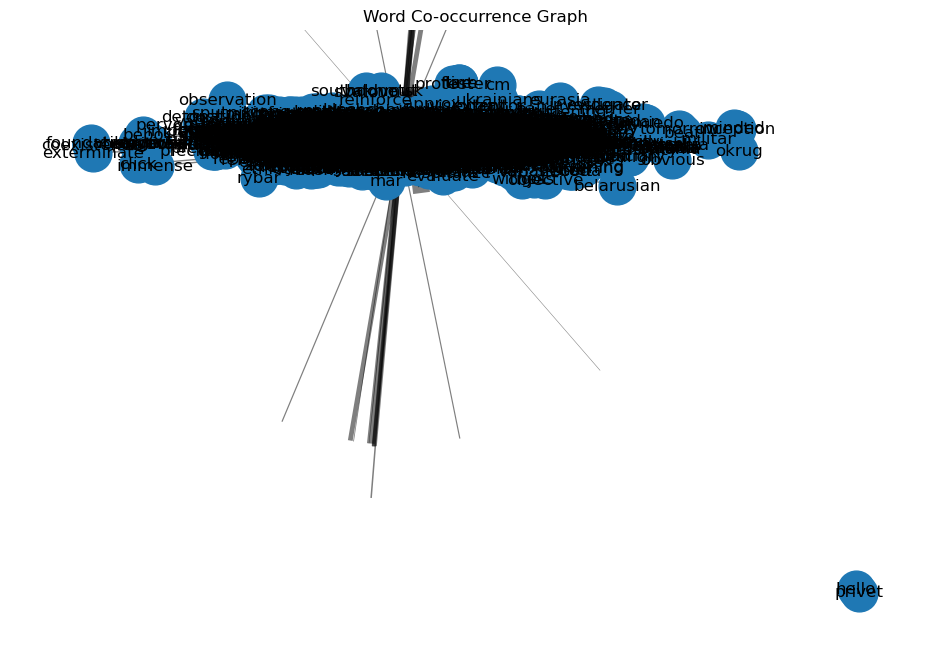

In [13]:
ignore_words = ["Telegram", "TikTok", "Sputnik Africa"]

G = nx.Graph()

for word_list in list_words:
    words = [word for word in word_list if word not in ignore_words]
    
    for word1, word2 in combinations(words, 2):
        if G.has_edge(word1, word2):
            G[word1][word2]['weight'] += 1
        else:
            G.add_edge(word1, word2, weight=1)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G) 

nx.draw_networkx_nodes(G, pos, node_size=700)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] for (u, v, d) in edges], alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Word Co-occurrence Graph")
plt.axis('off')
plt.show()

nx.write_gexf(G, "segment_data.gexf")


In [7]:
nx.write_gexf(G, "kwl_l.gexf")

In [8]:
# import json
# import plotly.graph_objects as go
# import plotly.express as px
# import pandas as pd
# from urllib.parse import urlparse
# import networkx as nx
# import matplotlib.pyplot as plt
# from itertools import combinations

# if __name__ == "__main__":

#     file_path = "../data/1eb80fb8b50.json"

#     try:
#         with open(file_path, "r") as json_file:
#             data = json.load(json_file)
#     except FileNotFoundError:
#         print(f"File not found: {file_path}")
#     except json.JSONDecodeError as e:
#         print(f"JSON decoding error: {e}")
        
#     df_kws_article = pd.DataFrame(columns=["year", "month", "day", "url", "title", "content", "kws", "locations", "organizations", "persons"])

#     Years = ["2024"]
#     for year in Years:
#         for month in range(1, 13): 
#             for day in range(1, 32): 
#                 try:
#                     num = 0
#                     while(True):
#                         try :
#                             data_tmp = data['data'][str(year)][str(month)][str(day)][num]
#                             num += 1
                            
#                             new_data = pd.DataFrame({"year": year, 
#                                                     'month': month,
#                                                     'day': day,
#                                                     'url' : data_tmp["url"],
#                                                     'title' : data_tmp["title"],
#                                                     'content' : data_tmp["content"],
#                                                     'kws': [data_tmp["kws"]],
#                                                     'locations': [data_tmp["loc"]],
#                                                     'organizations': [data_tmp["org"]],
#                                                     'persons': [data_tmp["per"]]
#                                                     })
#                             df_kws_article = pd.concat([df_kws_article, new_data], ignore_index=True)
#                         except e :
#                             break
#                 except:
#                     continue

#     list_words = df_kws_article["persons"].tolist()

# # Create a graph
# G = nx.Graph()

# # Iterate through each dictionary
# for dictionary in list_words:
#     # Get all words in the current dictionary
#     words = list(dictionary.keys())
    
#     # Generate all combinations of words (edges) from the current dictionary
#     for word1, word2 in combinations(words, 2):
#         # Get the minimum frequency of the two words
#         weight = min(dictionary[word1], dictionary[word2])
        
#         # Add the edge to the graph (if it doesn't exist, initialize the weight)
#         if G.has_edge(word1, word2):
#             G[word1][word2]['weight'] += weight
#         else:
#             G.add_edge(word1, word2, weight=weight)

# # Draw the graph
# plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(G)  # positions for all nodes

# # Draw nodes
# nx.draw_networkx_nodes(G, pos, node_size=700)

# # Draw edges
# edges = G.edges(data=True)
# nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] for (u, v, d) in edges], alpha=0.5)

# # Draw labels
# nx.draw_networkx_labels(G, pos, font_size=12)

# # Show the plot
# plt.title("Word Co-occurrence Graph")
# plt.axis('off')  # Turn off the axis
# plt.show()

# nx.write_gexf(G, "persons.gexf")